## Import package

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import os
import warnings as wrn
wrn.filterwarnings('ignore', category = DeprecationWarning) 
wrn.filterwarnings('ignore', category = FutureWarning) 
wrn.filterwarnings('ignore', category = UserWarning) 
%matplotlib inline
sns.set
pd.set_option('display.max_rows', None)

### Load directory 

In [2]:
BASE_DIR = os.getcwd()
DATAPATH = os.path.join(BASE_DIR, 'vgsales.csv')

### Load the Data

In [3]:
df = pd.read_csv(DATAPATH)
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [6]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [7]:
df.nunique()

Rank            16598
Name            11493
Platform           31
Year               39
Genre              12
Publisher         578
NA_Sales          409
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      623
dtype: int64

### Find correlation

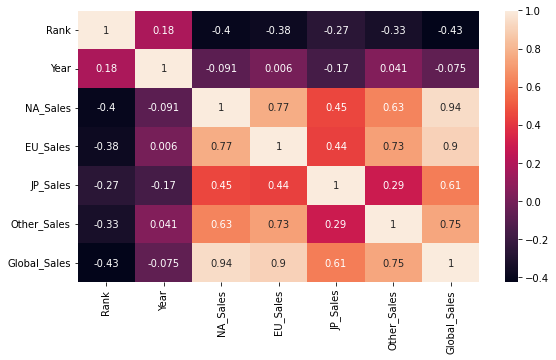

In [8]:
plt.figure(figsize=(9,5))
sns.heatmap(df.corr(), annot=True)
plt.show()

## Data Preparation

In [9]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Make Year to Int

In [10]:
df['Year'].fillna(0, inplace=True)
df['Year'] = df['Year'].apply(lambda x: int(x))
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Categories year 

In [11]:
df.sort_values(by="Year")['Year'].unique()

array([   0, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2020], dtype=int64)

In [12]:
def cat_year(x):
    if x<2000:
        return 'old_games'
    elif x in range(2000,2011):
        return 'mid_games'
    else:
        return 'recent_games'

In [13]:
df['cat_by_year'] = df['Year'].apply(cat_year)

In [14]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,cat_by_year
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,mid_games
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,old_games
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,mid_games
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,mid_games
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,old_games


### Drop missing value at Publisher Column

In [15]:
df.dropna(subset='Publisher',inplace=True)

In [16]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
cat_by_year     0
dtype: int64

# Analysis
* What games that has top global sales
* Sum of sales each region
* Compare sales between platform
* Find most favorit genre on each region (based on total sales)
* Top 5 Publisher that has big sales
* Find total sales on each category

### 1 - What video games that has top global sales

In [17]:
top5_global_sales=df.sort_values(['Global_Sales'], ascending=False).head(5)
top5_global_sales

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,cat_by_year
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,mid_games
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,old_games
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,mid_games
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,mid_games
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,old_games


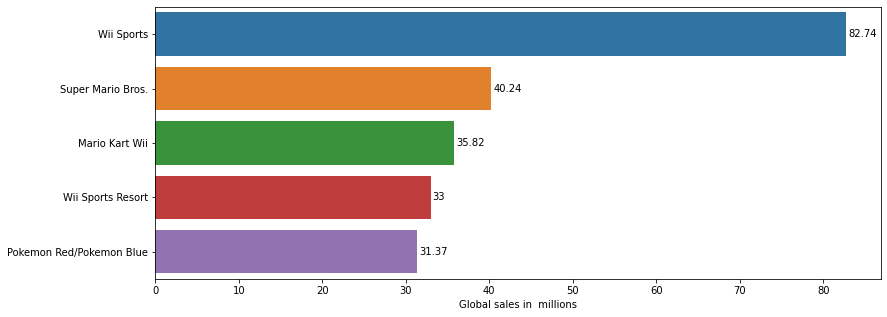

In [18]:
plt.figure(figsize=(13,5))
ax=sns.barplot(x=top5_global_sales['Global_Sales'], y=top5_global_sales.Name)
for container in ax.containers:
    ax.bar_label(container, padding=2)
    
plt.xlabel('Global sales in  millions')
plt.ylabel('')
plt.show()

### 2 - Total sales each region

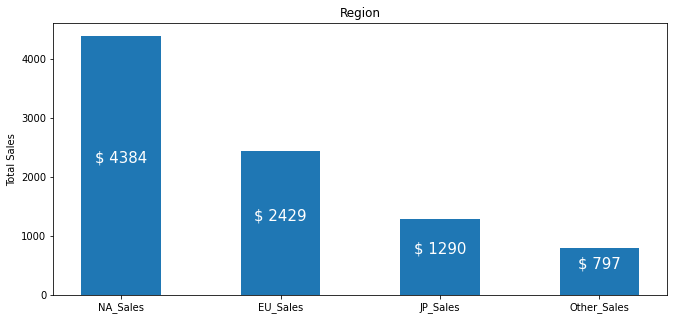

In [19]:
sales_per_region = df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()

fig, ax = plt.subplots(figsize=(11,5))

width = 0.5
ax.set_ylabel('Total Sales')
ax.set_title('Region')
pps = ax.bar(sales_per_region.index, sales_per_region, width)

# Create annotation (bar label)
for p in pps:
   height = p.get_height()
   ax.annotate('$ {}'.format(round(height)),
      xy=(p.get_x() + p.get_width() / 2, height/2),
      xytext=(0, 0),
      textcoords="offset points",
      ha='center', va='bottom', color='white', fontsize=15)

plt.show()

### 3 - Compare sales between platform

In [20]:
df_platform_sales = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(10)

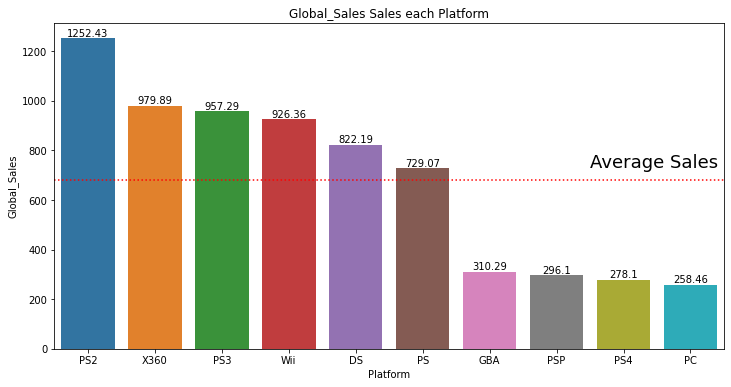

In [21]:
plt.figure(figsize=(12,6))
ax = sns.barplot(df_platform_sales.index, df_platform_sales)
for container in ax.containers:
    ax.bar_label(container)
    
plt.axhline(y = df_platform_sales.mean(), color = 'r', linestyle = ':', label='blue line')
plt.text(7.5,df_platform_sales.mean()+50,'Average Sales', fontsize=18)
ax.set_title('Global_Sales Sales each Platform')
plt.show()

### 4 - Find most favorit genre on each region (based on total sales)

In [22]:
print(df.Genre.unique())
df.columns

['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']


Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'cat_by_year'],
      dtype='object')

In [23]:
df.groupby(['Genre'])['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales'].sum()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,877.54,524.92,159.49,187.35
Adventure,105.67,64.08,51.99,16.81
Fighting,221.92,100.22,87.35,36.24
Misc,404.67,213.93,107.72,75.22
Platform,447.05,201.13,130.77,51.59
Puzzle,123.78,50.77,57.31,12.55
Racing,359.42,238.38,56.69,77.27
Role-Playing,327.28,188.05,352.26,59.61
Shooter,582.59,313.24,38.28,102.69


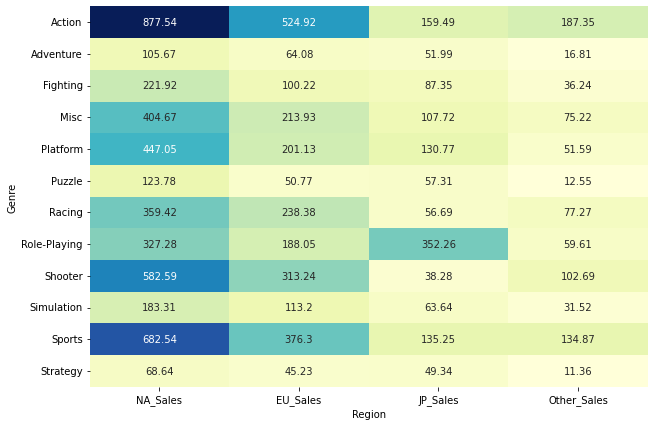

In [24]:
plt.figure(figsize=(10,7))
sns.heatmap(df.groupby('Genre')['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales'].sum(),
            cmap="YlGnBu", annot=True, cbar=False, fmt='g')
plt.xlabel('Region')
plt.show()

### 5 - Top 5 Publisher that has big sales

In [25]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,cat_by_year
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,mid_games
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,old_games
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,mid_games
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,mid_games
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,old_games


In [26]:
df_top_publisher = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(5)

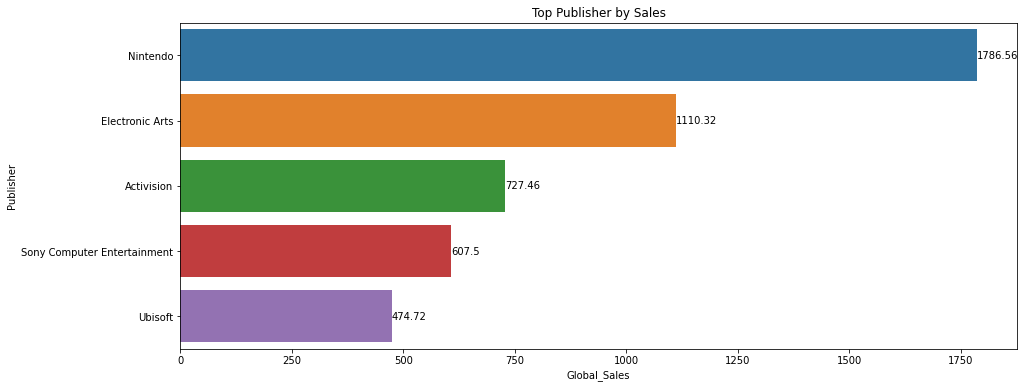

In [27]:
plt.figure(figsize=(15,6))
ax = sns.barplot(df_top_publisher,df_top_publisher.index)
for container in ax.containers:
    ax.bar_label(container)
    
ax.set_title('Top Publisher by Sales')
plt.show()

### 6 - Find total sales on each category

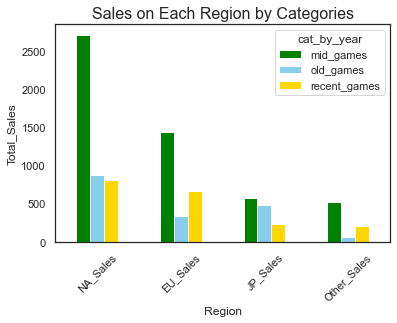

In [28]:
df_cat = df.groupby('cat_by_year')['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales'].sum().head(5)

sns.set(style='white')
df_cat.transpose().plot(kind='bar',color=['green', 'skyblue', 'gold'])
plt.title('Sales on Each Region by Categories', fontsize=16)
plt.xlabel('Region')
plt.ylabel('Total_Sales')
plt.xticks(rotation=45)
plt.show()